In [7]:
import bempp.api
import math
import numpy as np
import scipy 
from numpy.linalg import slogdet
import matplotlib.pyplot as plt
from scipy import integrate

bempp.core.opencl_kernels.set_default_cpu_device(0,0)

In [2]:
#bempp.api.GLOBAL_PARAMETERS.quadrature.regular = 6

In [2]:
dist = 3

In [3]:
h = 0.05

sphere1 = bempp.api.shapes.sphere(h=h, origin=((dist/2) + 1, 0, 0))
sphere2 = bempp.api.shapes.sphere(h=h, origin=(-((dist/2) + 1), 0, 0))

space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
space_sphere2 = bempp.api.function_space(sphere2, "P", 1)

In [30]:
wn_list = [1. + 0j,    0.999507 + 0.0314108j, 0.998027 + 0.0627905j, 0.995562 + 0.0941083j, 0.992115 + 0.125333j,
 0.987688 + 0.156434j, 0.982287 + 0.187381j, 0.975917 + 0.218143j, 0.968583 + 0.24869j, 0.960294 + 0.278991j, 
 0.951057 + 0.309017j, 0.940881 + 0.338738j, 0.929776 + 0.368125j, 0.917755 + 0.397148j, 0.904827 + 0.425779j, 
 0.891007 + 0.45399j,  0.876307 + 0.481754j, 0.860742 + 0.509041j, 0.844328 + 0.535827j, 0.827081 + 0.562083j, 
 0.809017 + 0.587785j, 0.790155 + 0.612907j, 0.770513 + 0.637424j, 0.750111 + 0.661312j, 0.728969 + 0.684547j, 
 0.707107 + 0.707107j, 0.684547 + 0.728969j, 0.661312 + 0.750111j, 0.637424 + 0.770513j, 0.612907 + 0.790155j, 
 0.587785 + 0.809017j, 0.562083 + 0.827081j, 0.535827 + 0.844328j, 0.509041 + 0.860742j, 0.481754 + 0.876307j, 
 0.45399 + 0.891007j, 0.425779 + 0.904827j, 0.397148 + 0.917755j, 0.368125 + 0.929776j, 0.338738 + 0.940881j, 
 0.309017 + 0.951057j, 0.278991 + 0.960294j, 0.24869 + 0.968583j, 0.218143 + 0.975917j, 0.187381 + 0.982287j, 
 0.156434 + 0.987688j, 0.125333 + 0.992115j, 0.0941083 + 0.995562j, 0.0627905 + 0.998027j, 0.0314108 + 0.999507j, 
 6.12323*1E-17 + 1j]

In [31]:
wn_list_01 = []
for i in range(len(wn_list)):
    wn_list_01.append(wn_list[i]*0.1)

In [ ]:
theta = np.linspace(0,0.5,51)

In [ ]:
wn_list_mine = []
for i in range(51):
    wn_list_mine.append(np.cos(np.pi*theta[i]) + 1j * np.sin(np.pi*theta[i]))

In [ ]:
plt.figure(figsize = [5,5])
plt.scatter(np.array(wn_list).real, np.array(wn_list).imag)

In [49]:
Alex_result = [-0.0912545 - 0.249449j, -0.0898555 - 0.240964j, 
-0.0886692 - 0.232707j, -0.0876774 - 0.224674j, 
-0.0868629 - 0.216859j, -0.0862097 - 0.209259j, 
-0.0857027 - 0.201867j, -0.0853277 - 0.19468j, 
-0.0850715 - 0.187691j, -0.0849218 - 0.180896j, 
-0.0848672 - 0.174288j, -0.0848969 - 0.167861j,
-0.0850011 - 0.16161j, -0.0851707 - 0.155529j, 
-0.0853972 - 0.14961j, -0.0856729 - 0.143849j,
-0.0859906 - 0.13824j, -0.0863438 - 0.132775j,
-0.0867264 - 0.127449j, -0.087133 - 0.122256j, 
-0.0875585 - 0.11719j, -0.0879985 - 0.112245j, 
-0.0884486 - 0.107416j, -0.0889052 - 0.102697j, 
-0.0893648 - 0.0980829j, -0.0898243 - 0.0935677j,
-0.090281 - 0.0891465j, -0.0907324 - 0.0848144j, 
-0.0911761 - 0.0805665j, -0.0916102 - 0.0763978j,
-0.0920329 - 0.0723039j, -0.0924424 - 0.0682802j, 
-0.0928375 - 0.0643224j, -0.0932167 - 0.0604261j,
-0.093579 - 0.0565873j, -0.0939233 - 0.052802j, 
-0.0942488 - 0.0490663j, -0.0945546 - 0.0453764j, 
-0.09484 - 0.0417285j, -0.0951045 - 0.0381192j,
-0.0953476 - 0.0345448j, -0.0955687 - 0.031002j, 
-0.0957675 - 0.0274874j, -0.0959436 - 0.0239977j, 
-0.0960968 - 0.0205296j, -0.0962268 - 0.01708j, 
-0.0963334 - 0.0136457j, -0.0964165 - 0.0102236j, 
-0.0964759 - 0.00681068j, -0.0965116 - 0.00340382j,
-0.0965235 - 5.061651E-19j]

In [12]:
Alex_result_01 = [-0.0324956 - 0.0294111j, -0.0318094 - 0.0286936j, -0.0311601 - 0.0279745j, -0.0305462 - 0.0272553j, -0.0299662 - 0.0265372j, 
 -0.0294186 - 0.0258213j, -0.028902 - 0.0251087j, -0.0284149 - 0.0244001j, -0.0279561 - 0.0236964j, -0.027524 - 0.0229983j, 
 -0.0271175 - 0.0223063j, -0.0267351 - 0.0216208j, -0.0263758 - 0.0209424j, -0.0260382 - 0.0202712j, -0.0257212 - 0.0196076j, 
 -0.0254238 - 0.0189517j, -0.0251449 - 0.0183038j, -0.0248834 - 0.0176638j, -0.0246384 - 0.0170318j, -0.024409 - 0.0164078j, 
 -0.0241944 - 0.0157917j, -0.0239936 - 0.0151836j, -0.0238059 - 0.0145832j, -0.0236305 - 0.0139904j, -0.0234668 - 0.0134051j, 
 -0.0233141 - 0.0128271j, -0.0231718 - 0.0122562j, -0.0230392 - 0.0116922j, -0.0229159 - 0.0111348j, -0.0228013 - 0.0105838j, 
 -0.022695 - 0.010039j, -0.0225964 - 0.00950014j, -0.0225052 - 0.00896686j, -0.0224209 - 0.00843893j, -0.0223433 - 0.00791607j, 
 -0.022272 - 0.007398j, -0.0222066 - 0.00688443j, -0.0221469 - 0.00637506j, -0.0220926 - 0.0058696j, -0.0220435 - 0.00536775j, 
 -0.0219993 - 0.00486921j, -0.02196 - 0.00437369j, -0.0219252 - 0.00388088j, -0.0218949 - 0.00339049j, -0.0218689 - 0.00290221j, 
 -0.021847 - 0.00241574j, -0.0218293 - 0.00193078j, -0.0218156 - 0.00144703j, -0.0218059 - 0.000964184j, -0.0218 - 0.000481941j, 
 -0.0217981 - 4.80523*1E-18j]

In [45]:
value_list = np.zeros(len(wn_list_01), dtype = complex)

for index, wavenumber in enumerate(wn_list_01):

    slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
    slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
    slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
    slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)
    mat11 = slp11.weak_form().A
    mat12 = slp12.weak_form().A
    mat21 = slp21.weak_form().A
    mat22 = slp22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))
    mat = np.block([[mat11,mat12],[mat21,mat22]])  
    mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])

    value_list[index] = np.log(np.linalg.det(mat @ np.linalg.inv(mat2)))
    #print(np.linalg.norm(value_list[index] - Alex_result[index])/np.linalg.norm(Alex_result[index]))

In [46]:
err_02_01 = []
for i in range(len(value_list)):
    err_02_01.append(np.linalg.norm(value_list[i] - Alex_result_01[i])/np.linalg.norm(Alex_result_01[i]))

In [23]:
err_005_01 = [0.0006408287246627176, 0.0006432908031392512, 0.0006459768756235997, 0.0006499571333789479, 0.0006538415095713782,
              0.0006564578409077033, 0.000660692281716098, 0.0006619157444599051, 0.0006663830308544668, 0.0006687658925702503,
              0.0006737317531442934, 0.0006745405825510268, 0.0006803129161962753, 0.0006821103248724354, 0.0006833596353611395,
              0.0006858918001736483, 0.0006915334229249035, 0.0006931538826336006, 0.0006956088811091115, 0.0006976851344906096, 
              0.0007020305837153759, 0.0007057889744453964, 0.0007083774237001446, 0.0007086408845497174, 0.0007104710137446652,
              0.0007129047598643531, 0.000716280334610018, 0.000716533075275246, 0.0007185237357793226, 0.000719982632798585,
              0.0007242600828801545, 0.0007261115961924799, 0.0007281525834211018, 0.0007272567545238781, 0.0007302220615496129,
              0.0007339776476362175, 0.0007345916566856662, 0.000736557233263589, 0.0007366894807387053, 0.0007385540686086631,
              0.0007370984865851787, 0.0007408976642762818, 0.0007400602857735654, 0.0007422321148816344, 0.0007432331456043257, 
              0.0007401223052528172, 0.000742040744142619, 0.0007423553459589996, 0.0007448137380158455, 0.0007418541423442622,
              0.0007434409208937353]
err_01_01 = [0.002587578324759615, 0.00259964973715541, 0.0026119733009817964, 0.0026256045466018884, 0.0026391414001888437,
             0.0026514009958300746, 0.0026652500216181626, 0.0026760560199021923, 0.0026900471154791706, 0.0027018954523284795,
             0.0027162447843076466, 0.0027263574167889653, 0.002741323348148609, 0.002752212645939332, 0.0027624321121853938,
             0.0027738002114289233, 0.002788129404500567, 0.0027982922818310016, 0.002809126837036473, 0.002819413091402742, 
             0.0028317840910554613, 0.00284338214771737, 0.00285361605472236, 0.002861326874386909, 0.002870389893976912, 
             0.0028798373069884456, 0.002889999846171016, 0.0028968141481545387, 0.002905127669101035, 0.002912666241693538, 
             0.0029227687914945644, 0.002930199903220642, 0.002937560184612732, 0.0029417270627630555, 0.0029494804003329907,
             0.002957750769523359, 0.002962611584251015, 0.0029685429993620196, 0.0029723632899459323, 0.002977628275064378,
             0.0029792931587087203, 0.002985911417691826, 0.002987611591923532, 0.002992020802177367, 0.0029949660681834462,
             0.0029935118269208776, 0.0029967776614388177, 0.0029981436668719973, 0.0030013487208045697, 0.002998847353084957,
             0.0030005809912790503]

err_015_01 = [0.005343520907184049, 0.005368875644909068, 0.005394520514473247, 0.0054214916110051515, 0.005448369251386222,
              0.0054739565905603, 0.005501094452244697, 0.005525141274202449, 0.005552291317853019, 0.005577218730741714,
              0.005604531628699539, 0.005627496910121943, 0.005655164489010555, 0.005678609008480494, 0.0057012190964355735, 
              0.005724786450004885, 0.005751112741760711, 0.0057730711153934754, 0.005795474621607261, 0.005817093059667613, 
              0.005840538022576828, 0.0058629570930057015, 0.0058837415739140956, 0.005901727560691823, 0.005920768742720366,
              0.005939891638346156, 0.005959415737189457, 0.005975282589037621, 0.005992313726237989, 0.006008235824356398, 
              0.006026370788973697, 0.006041494612740777, 0.006056187612743569, 0.006067334802680759, 0.006081686711739261, 
              0.006096179665559111, 0.006106893547004936, 0.006118290133022312, 0.006127192740136432, 0.006137143237383236, 
              0.006143108095201353, 0.006153610036716459, 0.006158806403222826, 0.006166297956057214, 0.0061719216243112255, 
              0.006172749942705601, 0.006177871641778822, 0.006180685969882558, 0.006184919379400932, 0.006183049496491859,
              0.006184985248263596]
err_02_01 = [0.009990408276437586, 0.01003878770438946, 0.010087527335889683, 0.010137621551642636, 0.01018762598616638,
             0.010236315030330187, 0.010286483206451372, 0.01033348376551853, 0.010383448581224333, 0.01043104138506779, 
             0.010480825753016176, 0.010526070119117685, 0.010575750154280996, 0.010620963385500587, 0.010665047628986856, 
             0.010709769890620245, 0.010756888551055735, 0.010799293649195515, 0.010841752844055664, 0.01088301876321037, 
             0.010925672895406193, 0.0109668463208533, 0.011005923866241643, 0.011041727369754485, 0.01107807217963355, 
             0.011113972848062495, 0.011149731598447218, 0.011181293559611841, 0.011213446274686163, 0.011243911516338741, 
             0.011275979398274166, 0.0113044398934407, 0.011331852679778164, 0.011355104863403936, 0.011380904630081179, 
             0.011406191590361653, 0.0114270581694884, 0.011447935754778525, 0.011465654813749403, 0.011483733382032403, 
             0.011497157140675143, 0.011514397576643489, 0.011525659304838657, 0.011538498364813526, 0.011548768921766773, 
             0.01155355659930623, 0.0115618985284358, 0.011567225693946524, 0.011573243611771127, 0.011572468895917587,
             0.011574755535713882]

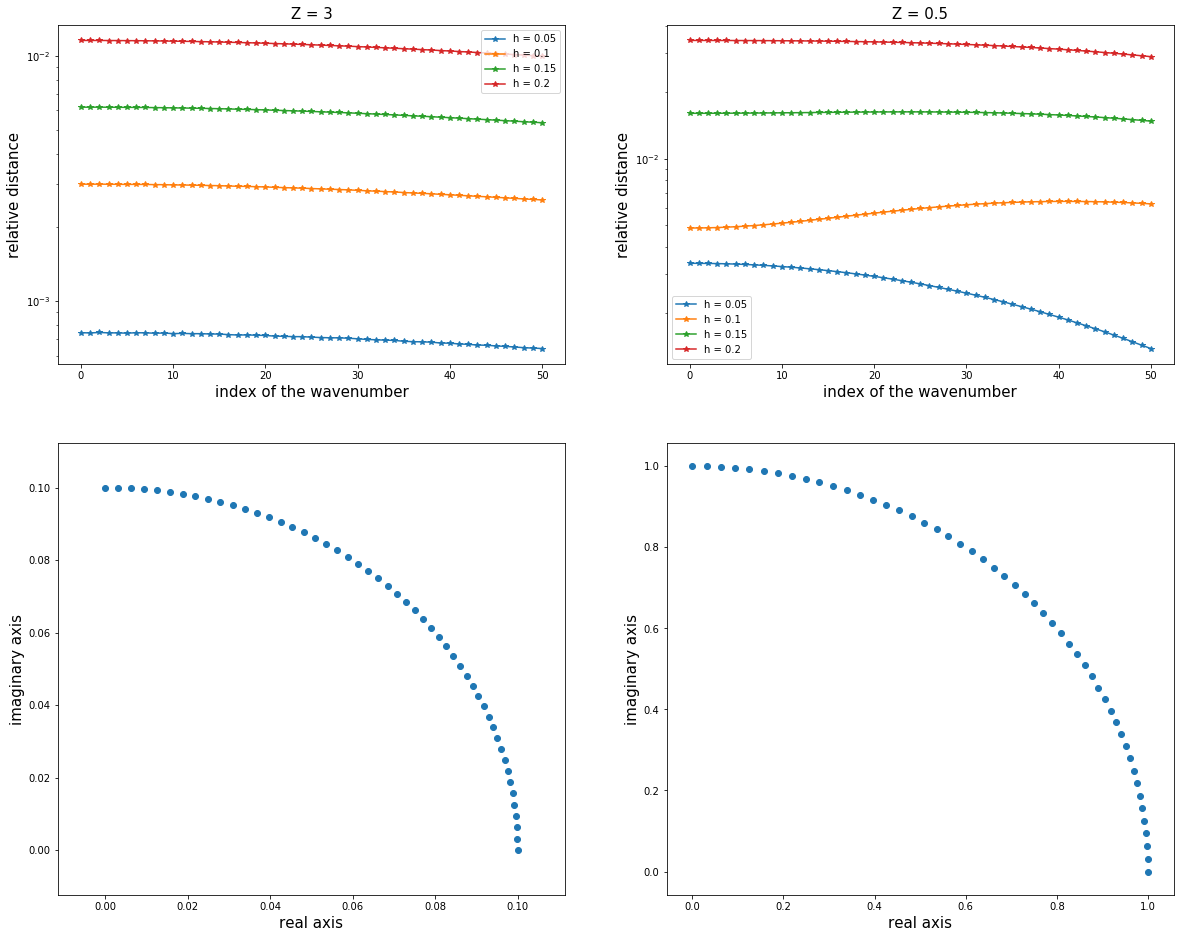

In [32]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20, 16), gridspec_kw={'height_ratios': [3, 4]})

ax1.semilogy(range(len(err_005_01)), err_005_01[::-1], '*-')
ax1.semilogy(range(len(err_005_01)), err_01_01[::-1], '*-')
ax1.semilogy(range(len(err_005_01)), err_015_01[::-1], '*-')
ax1.semilogy(range(len(err_005_01)), err_02_01[::-1], '*-')
ax1.legend(['h = 0.05', 'h = 0.1', 'h = 0.15', 'h = 0.2'])
ax1.set_ylabel('relative distance', fontsize = 15)
ax1.set_xlabel('index of the wavenumber', fontsize = 15)
ax1.set_title('Z = 3', fontsize = 15)

ax2.semilogy(range(len(err_005_01)), err_005[::-1], '*-')
ax2.semilogy(range(len(err_005_01)), err_01[::-1], '*-')
ax2.semilogy(range(len(err_005_01)), err_015[::-1], '*-')
ax2.semilogy(range(len(err_005_01)), err_02[::-1], '*-')
ax2.legend(['h = 0.05', 'h = 0.1', 'h = 0.15', 'h = 0.2'])
ax2.set_ylabel('relative distance', fontsize = 15)
ax2.set_xlabel('index of the wavenumber', fontsize = 15)
ax2.set_title('Z = 0.5', fontsize = 15)

ax3.scatter(np.array(wn_list_01).real, np.array(wn_list_01).imag)
ax3.set_ylabel('imaginary axis', fontsize = 15)
ax3.set_xlabel('real axis', fontsize = 15)

ax4.scatter(np.array(wn_list).real, np.array(wn_list).imag)
ax4.set_ylabel('imaginary axis', fontsize = 15)
ax4.set_xlabel('real axis', fontsize = 15)

fig.savefig('z = 3 and z = 05 transition.pdf')

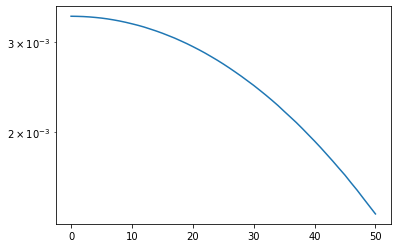

In [34]:
plt.semilogy(range(len(err_005_01)), err_005[::-1])

In [5]:
def funct_(t):
    slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, 0.1*np.exp(1j*t) + 0.1 + 0.1*1j)
    slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2, space_sphere1, space_sphere1, 0.1*np.exp(1j*t) + 0.1 + 0.1*1j)
    slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2, space_sphere2, 0.1*np.exp(1j*t) + 0.1 + 0.1*1j)
    slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2, space_sphere2, space_sphere2, 0.1*np.exp(1j*t) + 0.1 + 0.1*1j)
    mat11 = slp11.weak_form().A
    mat12 = slp12.weak_form().A
    mat21 = slp21.weak_form().A
    mat22 = slp22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))
    mat = np.block([[mat11,mat12],[mat21,mat22]])  
    mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])

    return np.log(np.linalg.det(mat @ np.linalg.inv(mat2))) * 0.1*np.exp(1j*t) * 1j

In [6]:
def func_modu(t):
    slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, 0.1*np.exp(1j*t) + 0.1 + 0.1*1j)
    slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2, space_sphere1, space_sphere1, 0.1*np.exp(1j*t) + 0.1 + 0.1*1j)
    slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2, space_sphere2, 0.1*np.exp(1j*t) + 0.1 + 0.1*1j)
    slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2, space_sphere2, space_sphere2, 0.1*np.exp(1j*t) + 0.1 + 0.1*1j)
    mat11 = slp11.weak_form().A
    mat12 = slp12.weak_form().A
    mat21 = slp21.weak_form().A
    mat22 = slp22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))
    mat = np.block([[mat11,mat12],[mat21,mat22]])  
    mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])

    return np.linalg.norm(np.log(np.linalg.det(mat @ np.linalg.inv(mat2)))) * 0.1

In [7]:
def complex_quad(func_, a, b):
    def real_func(x):
        return scipy.real(func_(x))
    def imag_func(x):
        return scipy.imag(func_(x))
    real_integral = integrate.quad(real_func, a, b)
    imag_integral = integrate.quad(imag_func, a, b)
    return (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])

In [8]:
complex_quad(func_modu, 0, 2*np.pi)

((0.015207940013890593+0j), (1.3809560021773546e-12,), (0.0,))

In [ ]:
h = 0.2 
((5.334708369497676e-15-1.8283985436795547e-15j),
 (1.1863797612495994e-10,),
 (4.646137037275268e-09,))

h = 0.15
((8.60596316432094e-15+7.721992858123102e-16j),
 (8.815833285285746e-15,),
 (2.1640675362810669e-16,))

h = 0.1 
((-1.07032438467769e-15+2.634204464874356e-16j),
 (8.526489768649213e-15,),
 (2.1700306482297371e-16,))

In [ ]:
0.0152186
h = 0.2
((0.015052012735735148+0j), (1.4037898354664802e-12,), (0.0,))
h = 0.15
((0.015129558804997069+0j), (1.3930471702828216e-12,), (0.0,))
h = 0.1
((0.015175455650892155+0j), (1.3845418786783477e-12,), (0.0,))
h = 0.05
((0.015207940013890593+0j), (1.3809560021773546e-12,), (0.0,))


In [6]:
err_modulus_3 = [0.010946293631796115, 0.005850813806981718, 0.002834974906222992, 0.000700457736546551]
err_modulus_05 = [0.022397071896840138, 0.011761163403844933, 0.005281765564534713, 0.0005815446217193287]

Text(0.5, 1.0, 'Compare the value of the modulus integral around the circle')

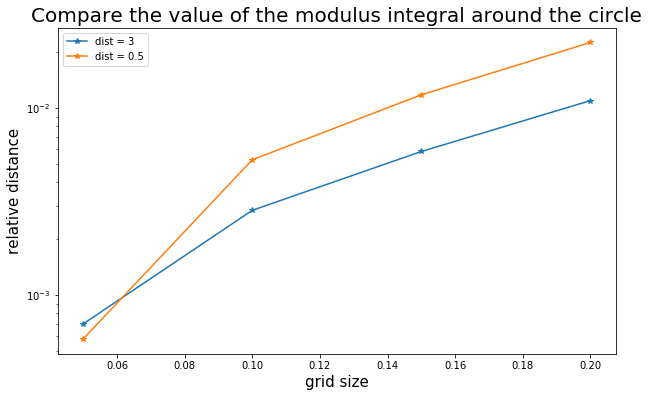

In [9]:
plt.figure(figsize = [10,6])
plt.semilogy([0.2, 0.15, 0.1, 0.05], err_modulus_3, '-*')
plt.semilogy([0.2, 0.15, 0.1, 0.05], err_modulus_05, '-*')
plt.xlabel('grid size', fontsize = 15)
plt.ylabel('relative distance', fontsize = 15)
plt.legend(['dist = 3', 'dist = 0.5'])
plt.title('Compare the value of the modulus integral around the circle', fontsize = 20)
#plt.savefig('compare modulus integral.pdf')

In [ ]:
# dist = 0.5
Alex = 0.183334

h = 0.2
0.1792278552208647

h = 0.15
0.1811777788685195

h = 0.1 
0.1823656727919916

h = 0.05
0.1832273830983217

In [4]:
(0.183334 - 0.1832273830983217)/0.183334

0.0005815446217193287

In [ ]:
err_modulus_03 = [0.022397071896840138, 0.011761163403844933, 0.005281765564534713, 0.0005815446217193287]

In [6]:
wavenumber = wn_list[0]

slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)
mat11 = slp11.weak_form().A
mat12 = slp12.weak_form().A
mat21 = slp21.weak_form().A
mat22 = slp22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))
mat = np.block([[mat11,mat12],[mat21,mat22]])  
mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])
combined = np.linalg.inv(mat2).dot(mat)
evals,evec_left,evec_right = scipy.linalg.eig(combined, left = True, right = True)

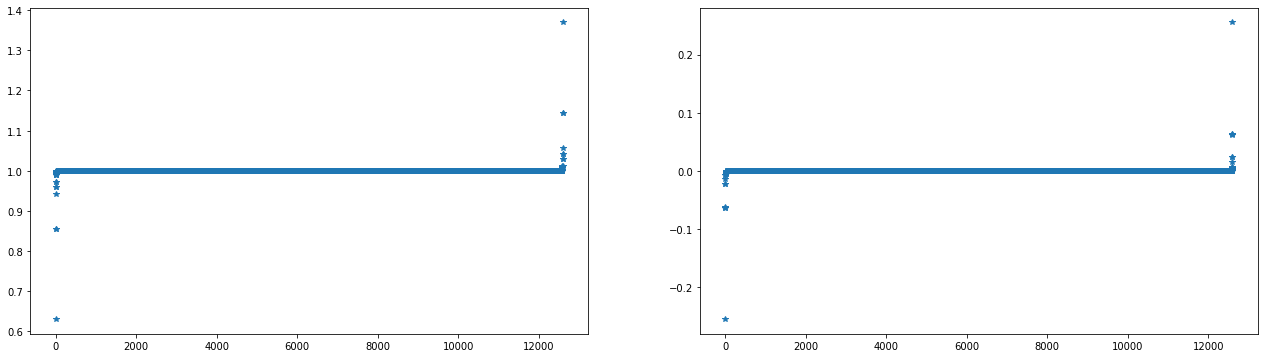

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

ax1.plot(range(len(evals)), sorted(np.real(evals)), '*')
ax2.plot(range(len(evals)), sorted(np.imag(evals)), '*')

In [8]:
cond_list = []
for i in range(len(evals)):
    cond_list.append(np.linalg.norm(evec_right[:,i])*np.linalg.norm(evec_left[:,i])/np.dot(evec_right[:,i], evec_left[:,i]))

In [9]:
wavenumber = wn_list[10]

slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)
mat11 = slp11.weak_form().A
mat12 = slp12.weak_form().A
mat21 = slp21.weak_form().A
mat22 = slp22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))
mat = np.block([[mat11,mat12],[mat21,mat22]])  
mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])
combined = np.linalg.inv(mat2).dot(mat)
evals1,evec_left,evec_right = scipy.linalg.eig(combined, left = True, right = True)

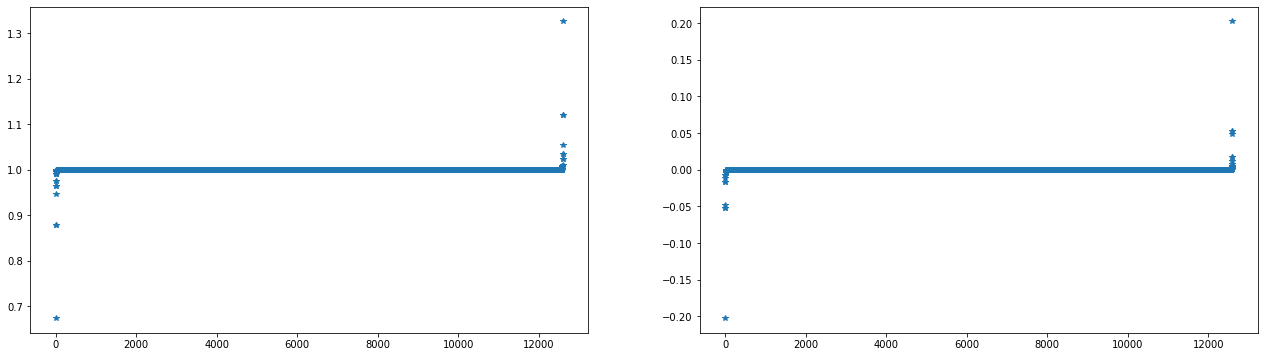

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

ax1.plot(range(len(evals)), sorted(np.real(evals1)), '*')
ax2.plot(range(len(evals)), sorted(np.imag(evals1)), '*')

In [17]:
cond_list1 = []
for i in range(len(evals1)):
    cond_list1.append(np.linalg.norm(evec_right[:,i])*np.linalg.norm(evec_left[:,i])/np.dot(evec_right[:,i], evec_left[:,i]))

In [21]:
wavenumber = wn_list[20]

slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)
mat11 = slp11.weak_form().A
mat12 = slp12.weak_form().A
mat21 = slp21.weak_form().A
mat22 = slp22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))
mat = np.block([[mat11,mat12],[mat21,mat22]])  
mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])
combined = np.linalg.inv(mat2).dot(mat)
evals2,evec_left,evec_right = scipy.linalg.eig(combined, left = True, right = True)

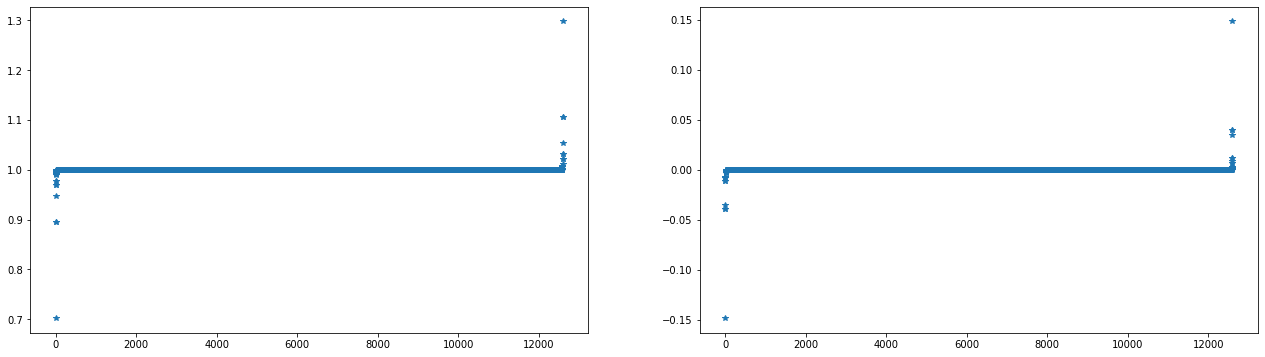

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

ax1.plot(range(len(evals)), sorted(np.real(evals2)), '*')
ax2.plot(range(len(evals)), sorted(np.imag(evals2)), '*')

In [23]:
cond_list2 = []
for i in range(len(evals2)):
    cond_list2.append(np.linalg.norm(evec_right[:,i])*np.linalg.norm(evec_left[:,i])/np.dot(evec_right[:,i], evec_left[:,i]))

In [24]:
wavenumber = wn_list[30]

slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)
mat11 = slp11.weak_form().A
mat12 = slp12.weak_form().A
mat21 = slp21.weak_form().A
mat22 = slp22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))
mat = np.block([[mat11,mat12],[mat21,mat22]])  
mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])
combined = np.linalg.inv(mat2).dot(mat)
evals3,evec_left,evec_right = scipy.linalg.eig(combined, left = True, right = True)

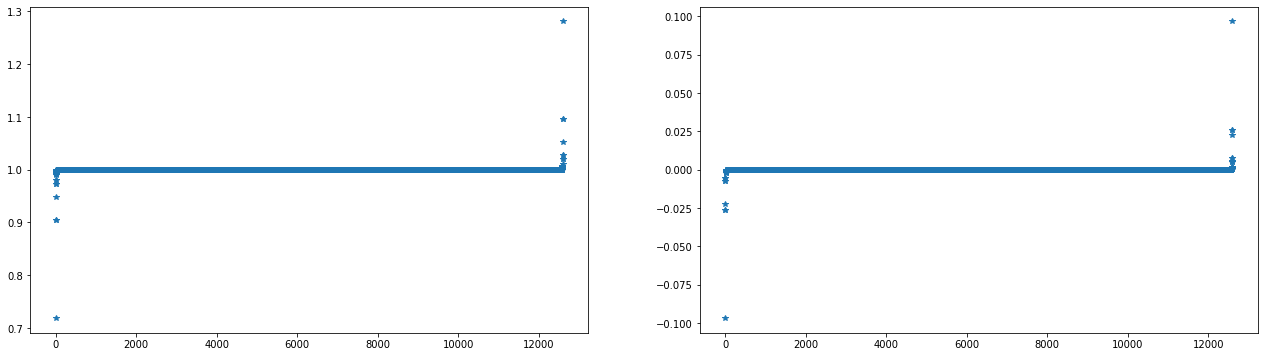

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

ax1.plot(range(len(evals)), sorted(np.real(evals3)), '*')
ax2.plot(range(len(evals)), sorted(np.imag(evals3)), '*')

In [26]:
cond_list3 = []
for i in range(len(evals3)):
    cond_list3.append(np.linalg.norm(evec_right[:,i])*np.linalg.norm(evec_left[:,i])/np.dot(evec_right[:,i], evec_left[:,i]))

In [29]:
wavenumber = wn_list[40]

slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)
mat11 = slp11.weak_form().A
mat12 = slp12.weak_form().A
mat21 = slp21.weak_form().A
mat22 = slp22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))
mat = np.block([[mat11,mat12],[mat21,mat22]])  
mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])
combined = np.linalg.inv(mat2).dot(mat)
evals4,evec_left,evec_right = scipy.linalg.eig(combined, left = True, right = True)

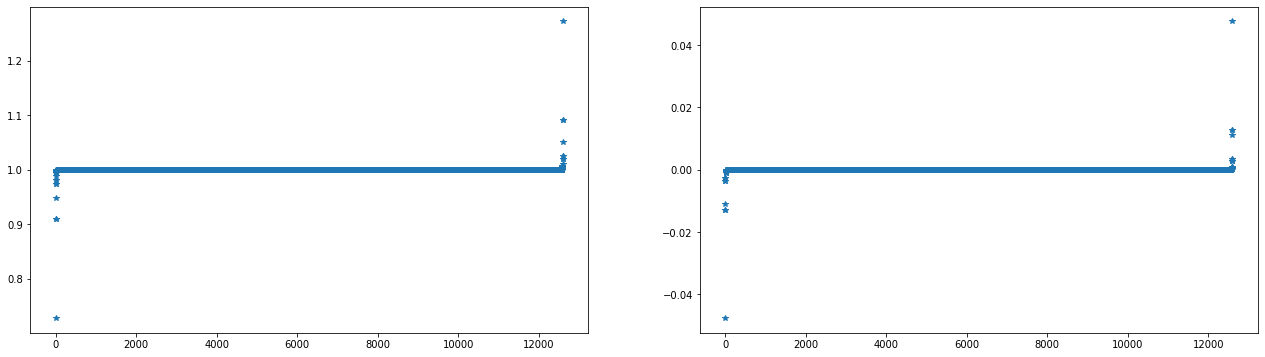

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

ax1.plot(range(len(evals)), sorted(np.real(evals4)), '*')
ax2.plot(range(len(evals)), sorted(np.imag(evals4)), '*')

In [31]:
cond_list4 = []
for i in range(len(evals4)):
    cond_list4.append(np.linalg.norm(evec_right[:,i])*np.linalg.norm(evec_left[:,i])/np.dot(evec_right[:,i], evec_left[:,i]))

In [32]:
wavenumber = wn_list[50]

slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)
mat11 = slp11.weak_form().A
mat12 = slp12.weak_form().A
mat21 = slp21.weak_form().A
mat22 = slp22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))
mat = np.block([[mat11,mat12],[mat21,mat22]])  
mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])
combined = np.linalg.inv(mat2).dot(mat)
evals5,evec_left,evec_right = scipy.linalg.eig(combined, left = True, right = True)

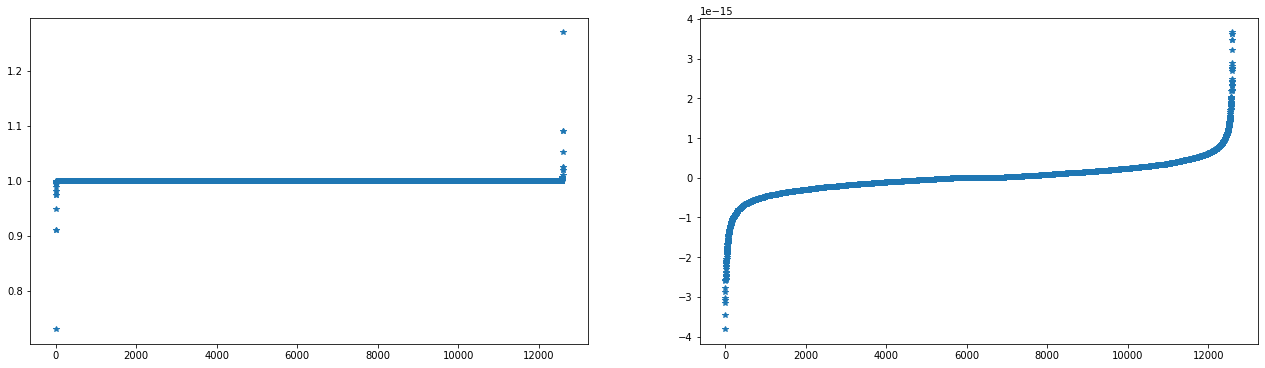

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

ax1.plot(range(len(evals)), sorted(np.real(evals5)), '*')
ax2.plot(range(len(evals)), sorted(np.imag(evals5)), '*')

In [34]:
cond_list5 = []
for i in range(len(evals5)):
    cond_list5.append(np.linalg.norm(evec_right[:,i])*np.linalg.norm(evec_left[:,i])/np.dot(evec_right[:,i], evec_left[:,i]))

In [ ]:
for i in range(len(evals1)):
    print(evals5[i],cond_list5[i])

In [ ]:
value_list = np.zeros(len(wn_list), dtype = complex)

for index, wavenumber in enumerate(wn_list):

    slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
    slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
    slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
    slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)
    mat11 = slp11.weak_form().A
    mat12 = slp12.weak_form().A
    mat21 = slp21.weak_form().A
    mat22 = slp22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))
    mat = np.block([[mat11,mat12],[mat21,mat22]])  
    mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])

    value_list[index] = np.log(np.linalg.det(mat @ np.linalg.inv(mat2)))
    print(np.linalg.norm(value_list[index] - Alex_result[index])/np.linalg.norm(Alex_result[index]))

In [ ]:
err = []
for i in range(len(value_list)):
    err.append(np.linalg.norm(value_list[i] - Alex_result[i])/np.linalg.norm(Alex_result[i]))

In [ ]:
print(err)

In [25]:
err_02 = [0.02895672689712472, 0.02922709502999248, 0.02948948692124411, 0.02974538517230348, 0.029991264658001636, 
          0.0302307953409498, 0.03046022701817089, 0.030684316461129228, 0.030898244946257966, 0.031106895090239343,
          0.031307004970043684, 0.031497157236232025, 0.03168091853376377, 0.03185909093830769, 0.03202421557295807, 
          0.03218505875653018, 0.03234192228328875, 0.032486597028319325, 0.032625326872276345, 0.03275612946257448,
          0.032879645118027094, 0.0329961937724886, 0.03310659436406742, 0.033210901163831165, 0.03330958821213568,
          0.03340079794748338, 0.03348578949075774, 0.033565247856281656, 0.03363896823521958, 0.033707502171683494, 
          0.03377135940565793, 0.033829779720611006, 0.033884045933797104, 0.033932741387053246, 0.03397854837874907,
          0.03401956766102199, 0.03405689578851912, 0.03409128132626752, 0.03412007815667142, 0.034147912202768145, 
          0.03417276173691858, 0.03419379204227297, 0.03421209976976077, 0.03422838892166518, 0.034241702314252366, 
          0.03425306061121049, 0.03426282501549893, 0.03426982145899845, 0.03427486377281983, 0.03427816612853026, 
          0.03427866669101447]

In [26]:
err_015 = [0.014793338502084238, 0.01491437671540841, 0.015030350869154083, 0.015142694999330743, 0.015247487124276381,
           0.01534873129476551, 0.015442149461160026, 0.015532940774148898, 0.015615968078184965, 0.01569637721911541,
           0.015770674493432255, 0.015837409700340237, 0.015900437291486144, 0.015960464145206073, 0.01600964027060103,
           0.016057291021820692, 0.01610393170757862, 0.0161405999873591, 0.016173997965418407, 0.016202062067995713,
           0.016225555929897245, 0.01624462993939109, 0.016260468046683185, 0.016272934012029172, 0.016282686623223838,
           0.01628768829738731, 0.01628929097789267, 0.01628822753627118, 0.01628442859639419, 0.016278348317096302, 
           0.01627063892366652, 0.01626055638481749, 0.01624938613826321, 0.0162358207011893, 0.016222520243789836, 
           0.016207762420574, 0.016192563102643418, 0.016177787587426547, 0.016160762215325666, 0.016146319019780316,
           0.01613234402506927, 0.016118097164825474, 0.016104704891018347, 0.016092944088236184, 0.01608184246873156,
           0.016072494644766813, 0.016065274148932548, 0.01605902942477274, 0.016054605181871635, 0.016052225935656667, 
           0.016050824686018823]

In [27]:
err_01 = [0.006251063254611867, 0.006283326244566698, 0.006312388759906409, 0.006339747777549038, 0.006360722038599073,
          0.0063801787940949515, 0.006392649485237378, 0.006404375265434908, 0.006409553361028624, 0.006413845312405551, 
          0.006413228838928882, 0.006406184240163714, 0.006397172026023499, 0.006386531110076449, 0.006365573726387549, 
          0.006344748713715098, 0.006325121555448869, 0.006295824827400003, 0.0062645446978031654, 0.006228957621015821, 
          0.006190105449429855, 0.006147489509370509, 0.006103301664512364, 0.006056710585247356, 0.006008844939436013, 
          0.005957120749841598, 0.005903001964498657, 0.005847234693844376, 0.005790149458105713, 0.005731739475638668, 
          0.005673016667913743,0.005613287157681558, 0.005553646939151891, 0.005493231002651103, 0.005434369077298754,
          0.005376056501942675, 0.005318874044396967, 0.005264069913965549, 0.00520896622823366, 0.005158908643780118, 
          0.005111506234517928, 0.005066449929931836, 0.005024908004398519, 0.004987940921681062, 0.004954546178852621, 
          0.004926101077212278, 0.004903031368479842, 0.004884330736997851, 0.004870970768284957, 0.0048632000947521695,
          0.004859994274119673]

In [28]:
err_005 = [0.0013857262702749288, 0.0014353570273106895, 0.0014869496611600972, 0.0015412213922159376, 0.0015932252848587392,
           0.0016490567405428676, 0.0017012028284909264, 0.0017561829659844955, 0.001810504165979154, 0.0018665226978992872, 
           0.0019216912407365035, 0.0019762315030227456, 0.0020327033787976264, 0.002088632809650149, 0.0021422636117222867, 
           0.002196664890049532, 0.0022539921182992717, 0.002308248050268713, 0.002361913366333284, 0.0024146818658775837, 
           0.0024676339241823777, 0.002517922853169134, 0.0025693798044879907, 0.0026190731571173478, 0.002668542917231944, 
           0.0027168645233938645, 0.002763766856587237, 0.002808870598281147, 0.0028536962599039215, 0.002896223744792091,
           0.0029371926205064907, 0.002977257716264674, 0.0030146794232524107, 0.003051864765827975, 0.0030854370241214183,
           0.0031188671835563914, 0.0031497405988739984, 0.0031782435229225844, 0.003206530966667346, 0.003231412452088803, 
           0.0032537015102741163, 0.00327505900345395, 0.003294237991521076, 0.0033109664587221465, 0.003325829440936419,
           0.003338246309805887, 0.003347737054430641, 0.003355636643893365, 0.003361270203243453, 0.0033643334906860315, 
           0.003365970811610464]

In [55]:
sum_ = 0
for i in range(len(evals)):
    sum_ += np.log(evals5[i])
print(np.linalg.norm(sum_ - Alex_result[50])/np.linalg.norm(Alex_result[50]))

0.0033659707904637078


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 16), gridspec_kw={'height_ratios': [3, 4]})

ax1.semilogy(range(len(err_005)), err_005[::-1], '*-')
ax1.semilogy(range(len(err_005)), err_01[::-1], '*-')
ax1.semilogy(range(len(err_005)), err_015[::-1], '*-')
ax1.semilogy(range(len(err_005)), err_02[::-1], '*-')
ax1.legend(['h = 0.05', 'h = 0.1', 'h = 0.15', 'h = 0.2'])
ax1.set_ylabel('relative distance', fontsize = 15)
ax1.set_xlabel('index of the wavenumber', fontsize = 15)

ax2.scatter(np.array(wn_list).real, np.array(wn_list).imag)
ax2.set_ylabel('imaginary axis', fontsize = 15)
ax2.set_xlabel('real axis', fontsize = 15)
fig.savefig('move from real axis to imag axis.pdf')

In [ ]:
# 4:  0.1205179135982352 (default)

# 6:  0.12051771207885481

# 8： 0.12051770979552885

# 10：0.12051770974207285

In [ ]:
# 0.006522879669108886

# 0.0065228725298919705

# 0.006522872451067597

# 0.006522872450107315

In [ ]:
Alex_08 = 0.120394
Alex_0 = 0.338863
for h in [0.2, 0.15, 0.1, 0.05]:

    sphere1 = bempp.api.shapes.sphere(h=h, origin=((dist/2) + 1, 0, 0))
    sphere2 = bempp.api.shapes.sphere(h=h, origin=(-((dist/2) + 1), 0, 0))

    space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
    space_sphere2 = bempp.api.function_space(sphere2, "P", 1)

    wavenumber = 0

    slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere1, space_sphere1, wavenumber)
    slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere1, space_sphere1, wavenumber)
    slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere1, space_sphere2 , space_sphere2 , wavenumber)
    slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_sphere2 , space_sphere2 , space_sphere2 , wavenumber)

    mat11 = slp11.weak_form().A
    mat12 = slp12.weak_form().A
    mat21 = slp21.weak_form().A
    mat22 = slp22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

    mat = np.block([[mat11,mat12],[mat21,mat22]])  
    mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])

    combined = np.linalg.inv(mat2).dot(mat)
    sign, logdet = slogdet(combined)
    
    print((-logdet - Alex_0)/Alex_0)

In [ ]:
print(np.trapz(-np.array(results)/quad_points, quad_points)/(2*np.pi))